## Hough Space to Integer Mapping

In [2]:
#import necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

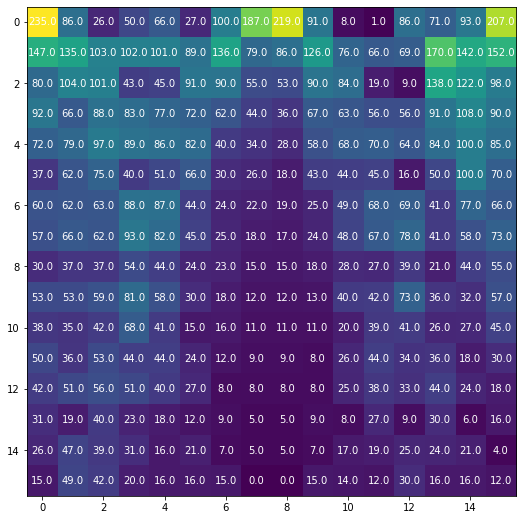

In [3]:
hough_space = np.array([[235., 147.,  80.,  92.,  72.,  37.,  60.,  57.,  30.,  53.,  38.,
         50.,  42.,  31.,  26.,  15.],
       [ 86., 135., 104.,  66.,  79.,  62.,  62.,  66.,  37.,  53.,  35.,
         36.,  51.,  19.,  47.,  49.],
       [ 26., 103., 101.,  88.,  97.,  75.,  63.,  62.,  37.,  59.,  42.,
         53.,  56.,  40.,  39.,  42.],
       [ 50., 102.,  43.,  83.,  89.,  40.,  88.,  93.,  54.,  81.,  68.,
         44.,  51.,  23.,  31.,  20.],
       [ 66., 101.,  45.,  77.,  86.,  51.,  87.,  82.,  44.,  58.,  41.,
         44.,  40.,  18.,  16.,  16.],
       [ 27.,  89.,  91.,  72.,  82.,  66.,  44.,  45.,  24.,  30.,  15.,
         24.,  27.,  12.,  21.,  16.],
       [100., 136.,  90.,  62.,  40.,  30.,  24.,  25.,  23.,  18.,  16.,
         12.,   8.,   9.,   7.,  15.],
       [187.,  79.,  55.,  44.,  34.,  26.,  22.,  18.,  15.,  12.,  11.,
          9.,   8.,   5.,   5.,   0.],
       [219.,  86.,  53.,  36.,  28.,  18.,  19.,  17.,  15.,  12.,  11.,
          9.,   8.,   5.,   5.,   0.],
       [ 91., 126.,  90.,  67.,  58.,  43.,  25.,  24.,  18.,  13.,  11.,
          8.,   8.,   9.,   7.,  15.],
       [  8.,  76.,  84.,  63.,  68.,  44.,  49.,  48.,  28.,  40.,  20.,
         26.,  25.,   8.,  17.,  14.],
       [  1.,  66.,  19.,  56.,  70.,  45.,  68.,  67.,  27.,  42.,  39.,
         44.,  38.,  27.,  19.,  12.],
       [ 86.,  69.,   9.,  56.,  64.,  16.,  69.,  78.,  39.,  73.,  41.,
         34.,  33.,   9.,  25.,  30.],
       [ 71., 170., 138.,  91.,  84.,  50.,  41.,  41.,  21.,  36.,  26.,
         36.,  44.,  30.,  24.,  16.],
       [ 93., 142., 122., 108., 100., 100.,  77.,  58.,  44.,  32.,  27.,
         18.,  24.,   6.,  21.,  16.],
       [207., 152.,  98.,  90.,  85.,  70.,  66.,  73.,  55.,  57.,  45.,
         30.,  18.,  16.,   4.,  12.]]).T

#hough_space = np.array([[247., 116.,  72.,  54.,  38.,  26.,  21.,  14.,   8.,   1.],
#               [ 91., 131., 121., 102.,  77.,  60.,  51.,  44.,  36.,  27.],
#               [ 78.,  78.,  78.,  80.,  94., 102.,  95.,  80.,  59.,  36.],
#               [ 75.,  98., 121., 105.,  90.,  76.,  61.,  49.,  43.,  32.],
#               [239., 145.,  75.,  57.,  42.,  33.,  24.,  20.,  18.,  13.],
#               [ 72.,  33.,  23.,  18.,  14.,   9.,   5.,   1.,   0.,   0.],
#               [  7.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
#               [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
#               [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
#               [ 58.,  29.,  17.,  11.,   6.,   0.,   0.,   0.,   0.,   0.]]).T

fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(hough_space)

# Loop over data dimensions and create text annotations.
for i in range(16):
    for j in range(16):
        text = ax.text(j, i, hough_space[i, j], ha="center", va="center", color="w")

Frequency of unique values:
[[  0.   1.   4.   5.   6.   7.   8.   9.  11.  12.  13.  14.  15.  16.
   17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  30.  31.
   32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
   47.  48.  49.  50.  51.  53.  54.  55.  56.  57.  58.  59.  60.  62.
   63.  64.  66.  67.  68.  69.  70.  71.  72.  73.  75.  76.  77.  78.
   79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
   93.  97.  98. 100. 101. 102. 103. 104. 108. 122. 126. 135. 136. 138.
  142. 147. 152. 170. 187. 207. 219. 235.]
 [  2.   1.   1.   4.   1.   2.   7.   6.   3.   6.   1.   1.   6.   8.
    2.   7.   4.   2.   3.   1.   2.   6.   4.   5.   5.   2.   6.   2.
    1.   1.   2.   1.   4.   3.   2.   3.   5.   4.   4.   2.   9.   4.
    1.   1.   2.   3.   3.   4.   1.   2.   3.   2.   3.   1.   1.   4.
    2.   1.   6.   2.   3.   2.   2.   1.   2.   2.   1.   1.   2.   1.
    2.   1.   1.   2.   1.   2.   1.   4.   1.   2.   2.   3.   3

<BarContainer object of 106 artists>

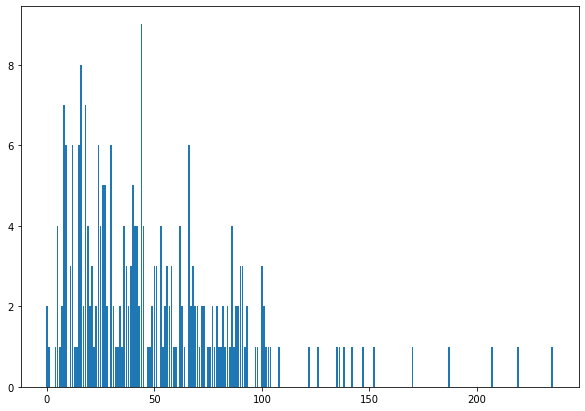

In [4]:
# Find the number of unique elements and find the distribution
unique_elements, counts_elements = np.unique(hough_space, return_counts=True)
print("Frequency of unique values:")
print(np.asarray((unique_elements, counts_elements)))
plt.figure(figsize=(10,7))
plt.bar(unique_elements, counts_elements)

In [5]:
new_h = [] # new h_matrix
# Filter out the low and common values
for i in range(10):
    for j in range(10):
        if (hough_space[i,j] >= 80):
            new_h.append(hough_space[i,j])

print(new_h)
common_elements = [item for item, count in collections.Counter(new_h).items() if count > 1]
print(common_elements)

[235.0, 86.0, 100.0, 187.0, 219.0, 91.0, 147.0, 135.0, 103.0, 102.0, 101.0, 89.0, 136.0, 86.0, 126.0, 80.0, 104.0, 101.0, 91.0, 90.0, 90.0, 92.0, 88.0, 83.0, 97.0, 89.0, 86.0, 82.0, 88.0, 87.0, 93.0, 82.0, 81.0]
[86.0, 91.0, 101.0, 89.0, 90.0, 88.0, 82.0]


In [6]:
# Remove Duplicates
count = 0
iter = 1
for l in range(len(common_elements)):
    for k in range(len(new_h)):
        if (new_h[k]==common_elements[l] and count==0):
            count = count + 1
        elif (new_h[k]==common_elements[l] and count>=1):
            new_h[k] = new_h[k] + iter
            iter = iter + 1
    count = 0
    iter = 1
    
print(new_h) # new list with duplicates removed

#Glitch: New iter updated values can be common with already existing values.

[235.0, 86.0, 100.0, 187.0, 219.0, 91.0, 147.0, 135.0, 103.0, 102.0, 101.0, 89.0, 136.0, 87.0, 126.0, 80.0, 104.0, 102.0, 92.0, 90.0, 91.0, 92.0, 88.0, 83.0, 97.0, 92.0, 89.0, 82.0, 90.0, 87.0, 93.0, 83.0, 81.0]


No Duplicates Found.
[235, 86, 100, 187, 219, 91, 147, 135, 103, 102, 101, 89, 136, 87, 126, 80, 104, 92, 90, 88, 83, 97, 82, 93, 81]


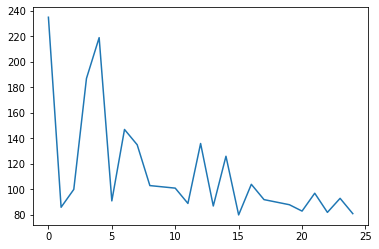

In [7]:
# updated new_h
new_h = np.array([235.0,86.0,100.0,187.0,219.0,91.0,147.0,135.0,103.0,102.0,101.0,89.0,136.0,87.0,126.0,80.0,104.0,92.0,90.0,88.0,83.0,97.0,82.0,93.0,81.0])

#Recheck for duplicates.
common_elements = [item for item, count in collections.Counter(new_h).items() if count > 1]
if common_elements==[]:
    print('No Duplicates Found.')

#Map to integers
int_new_h = [int(i) for i in new_h]
print(int_new_h)
plt.plot(range(len(int_new_h)),int_new_h,)

## What's Wrong?

- Duplicate Glitch: New iter updated values can be common with already existing values. Fix this.
- How to remap the results to labels i.e. set of hit coordinates???? Store indices of the vote counts?

In [8]:
#Encode Hough Space
#Import necessary libraries
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ, transpile, execute
from qiskit.visualization import plot_state_hinton, plot_histogram, plot_bloch_vector, plot_state_qsphere
from qiskit.providers.ibmq import least_busy
#from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx
import numpy as np

%config InlineBackend.figure_format = 'svg' # Makes the images look nice
%matplotlib inline

#Configuration of Initial Parameters
n = 8         #number of qubits --- must be a power of 2.
N = 2**n
M = 2         #number of solutions to mark
solution_known = True
phi_estimated = 0.0     #enter the estimated value to start

In [9]:
#Calculate Phase-Shift angle and Number of Iterations
beta = np.arcsin(np.sqrt(M/N))
J = np.floor(((np.pi/2) - beta)/beta) + 1
phi_val = 2*np.arcsin(np.sin(np.pi/(4*J + 2))/np.sin(beta))
J = int(J)

print("Number of Qubits, n \t\t= ", n)
print("Number of Marked Solutions, M \t= ", M, "\n")
print("Phase-Shift Parameter, φ \t= ", phi_val)
print("Number of Iternations, J \t= ", J)
print("β value \t\t\t= ", beta)

if solution_known == False:
    phi_val = phi_estimated
else:
    pass

#Quantum Circuit Definition
qc = QuantumCircuit(n)

Number of Qubits, n 		=  8
Number of Marked Solutions, M 	=  2 

Phase-Shift Parameter, φ 	=  1.0647651627596546
Number of Iternations, J 	=  17
β value 			=  0.08850384314401546


In [20]:
#Circuit Generators
def decimalToBinary(n):  
    return bin(n).replace("0b", "")

def to_binary_value(k):
    if k.is_integer() == True:
        if k%2 == 0:
            return gen_mark_circuit(int(decimalToBinary(k)))
        else:
            return gen_mark_circuit(int(decimalToBinary(k-1)))
    else:
        print("Marked Value is not an Integer.")

def gen_mark_circuit(val):
    string_bin = get_binary_value(val)
    #define quantum circuit here
    sub_q = QuantumRegister(qubits)
    sub_circ = QuantumCircuit(sub_q, name='marked-value = ' + str(val))
    #even case
    if val%2 == 0 :
        for qubit in range(n-1):
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
            qc.mcx([i for i in range(0, qubits)], 0)
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
        #-----            
        for qubit in range(n-1):
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
            qc.mcu1(phi_val, [i for i in range(0, qubits)], 0)
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
        #-----
        for qubit in range(n-1):
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
            qc.mcx([i for i in range(0, qubits)], 0)
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
        qc.append()
        
    #odd case
    else val%2 == 1:
        for qubit in range(n-1):
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)
            qc.mcu1(phi_val, [i for i in range(0, qubits)], 0)
            for c in map(int, string_bin):
                if c == 0:
                    qc.x(qubit-1)         
        qc.append()

In [10]:
#Complete Quantum Circuit

#Created equal superposition
for i in range(n):
    qc.h(i)
    
for k in range(J):

    #O_operator():
    #Even marked state = 254
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    
    #Odd marked state = 1
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    
    #odd-values
    #qc.append()
    
    #even-values
    #qc.append()

    #W_inverse_operator   #just use the default inverse() function to make W^-1 operartor
    for i in range(n):
        qc.h(i)
    qc.barrier()

    #def Io_operator():
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)

    #W_operator()
    for i in range(n):
        qc.h(i)
    qc.barrier()

qc.measure_all()
#qc.draw()

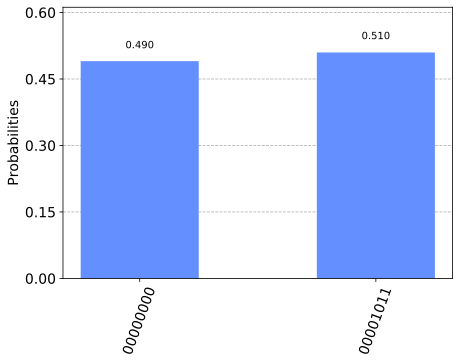

In [11]:
# ---- Execute on Local Simulator (upto 32 qubits) ----
backend = qiskit.BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()
#print(counts)
plot_histogram(counts)

In [ ]:
#Return 